<a href="https://colab.research.google.com/github/MuhammadBilall/Lab01/blob/master/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()
#df_wine.to_csv('WindeData.csv')

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [45]:
# Task 1:
# Check the counts of each wine class

from collections import Counter
winesCount = dict(Counter(df_wine['Class label']))
print(winesCount)

{1: 59, 2: 71, 3: 48}


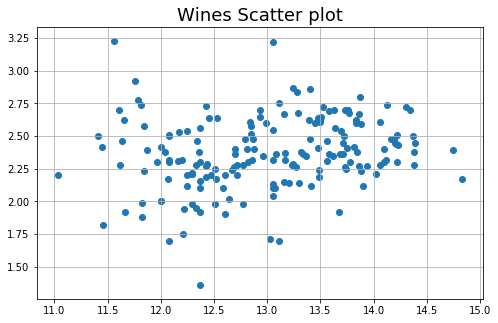

In [71]:
# Fetch data into x and y variables
x=df_wine.ix[:,1:14] # Covariates or input
y=df_wine.ix[:,:1] # Labels or classes or output

#print(x)
#print(y)

import matplotlib.pyplot as plt 
plt.figure(figsize=(8,5))
plt.title("Wines Scatter plot", fontsize=18)
plt.grid(True)
plt.scatter(df_wine['Alcohol'], df_wine['Ash'])
plt.savefig('CIRCLE.png', dpi=300)
plt.show()

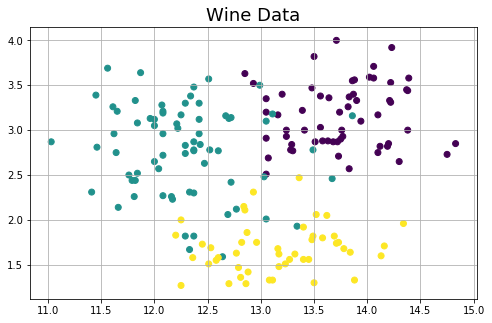

In [77]:
# Task 2
# Clustering using K Means Algorithm

from sklearn import cluster, datasets, metrics
km=cluster.KMeans(n_clusters=3)
km.fit(df_wine)
km.labels_

# Task 3
# Scatter plot data into 3 classes based on True Labaels and plot with legends. Hint: use any two variables

plt.figure(figsize=(8,5))
plt.title("Wine Data", fontsize=18)
plt.grid(True)
plt.scatter(df_wine['Alcohol'], df_wine['OD280/OD315 of diluted wines'],c=df_wine['Class label'])
plt.show()

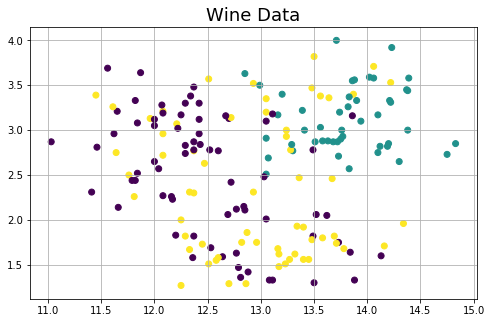

In [78]:
# Task 4
# Use cluster model labels two group them in predicted classes

plt.figure(figsize=(8,5))
plt.title("Wine Data", fontsize=18)
plt.grid(True)
plt.scatter(df_wine['Alcohol'], df_wine['OD280/OD315 of diluted wines'],c=km.labels_)
plt.show()

In [81]:
# Now we have splitted the data into 70:30 training and test subsets, respectively.

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_train)))
print(pd.value_counts(pd.Series(y_test)))

2    71
1    59
3    48
dtype: int64
2    50
1    41
3    33
dtype: int64
2    21
1    18
3    15
dtype: int64


In [0]:
# Standardizing the data
# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

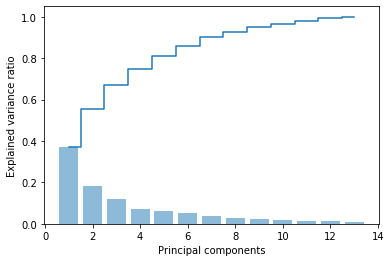

In [92]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

import matplotlib.pyplot as plt
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('PCA_WINE.png', dpi=300)
plt.show()

In [0]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

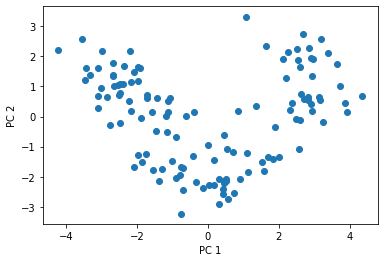

In [105]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('PCA_WINE_ULBL.png', dpi=300)
plt.show()

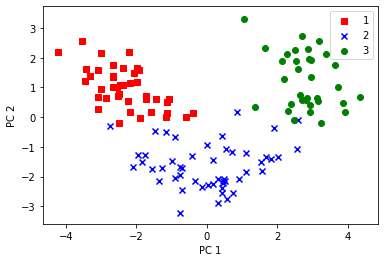

In [106]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.savefig('PCA_WINE_LBL.png', dpi=300)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train) # Train a Logistic regression model
pred_lab=lr.predict(X_test_pca) # Test on the test data
print("Accuracy on test is = %f" % (100 * accuracy_score(y_test, pred_lab)))

Accuracy on test is = 92.592593


In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


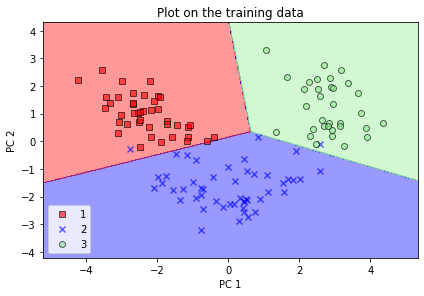

In [112]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the training data')
plt.savefig('TRAIN_CLASS.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


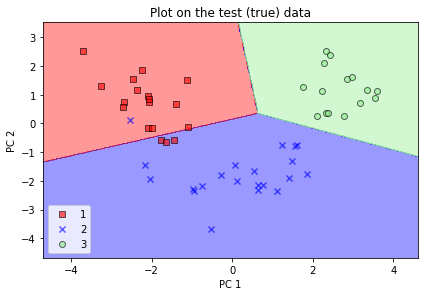

In [113]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the test (true) data')
plt.savefig('TEST_CLASS_TRUE.png', dpi=300)
plt.show()